In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import seaborn as sns

In [3]:
def time2 (frame,limit):
    
    if frame<limit :
        return "basal"
    return "stimulus"

In [4]:
def stimm (frame,limit,x,y):
    
    if frame<limit :
        return x
    return y

In [5]:
def onechannel_dfperf0 (file_path,f0_frame):
    data = pd.read_csv(file_path)
    frame=f0_frame
    for cell in data["Cell"].unique():
        df=data[data["Cell"]==cell]


        f0=df[df["Frames"]<frame]["green_"].mean()
        dfperf0=(df["green_"]-f0)/f0
        data.loc[dfperf0.index,"dfperf0"]=dfperf0.values

        data.loc[dfperf0.index,"dfperf0_null"]=dfperf0.values[:frame].mean()
        data.loc[dfperf0.index,"dfperf0_stim"]=dfperf0.values[frame-1:].mean()
        data.loc[df.green_.index,"green_stim"]=df.green_.values[frame-1:].mean()
        data.loc[df.green_.index,"green_null"]=df.green_.values[:frame].mean()

    # Add frame_rate for the time interval
    data["time"]=data.apply(lambda row: (row.Frames-1)*10,axis=1)
    data["time2"]=data.apply(lambda row: time2 (row.Frames,frame), axis=1)
    data["stim"]=data.apply(lambda row: stimm (row.Frames,frame,row.dfperf0_null,row.dfperf0_stim), axis=1)
    data["stimgreen"]=data.apply(lambda row: stimm (row.Frames,frame,row.green_null,row.green_stim), axis=1)
    
    return data
    
     

In [6]:
data2=onechannel_dfperf0 ("masterdf_analysis.csv",6)
data2

,Cell,Frames,tag,exp,green_,Cent.X,Cent.Y,dfperf0,dfperf0_null,dfperf0_stim,green_stim,green_null,time,time2,stim,stimgreen
0,LTB4S_s1_003_cell1,1,LTB4S,LTB4S_s1_003,74.025896,159,8,-0.064341,0.013973,1.249229,177.950675,80.221822,0,basal,0.013973,80.221822
1,LTB4S_s1_003_cell1,2,LTB4S,LTB4S_s1_003,77.216630,158,8,-0.024011,0.013973,1.249229,177.950675,80.221822,10,basal,0.013973,80.221822
2,LTB4S_s1_003_cell1,3,LTB4S,LTB4S_s1_003,79.054825,159,7,-0.000777,0.013973,1.249229,177.950675,80.221822,20,basal,0.013973,80.221822
3,LTB4S_s1_003_cell1,4,LTB4S,LTB4S_s1_003,81.208716,159,7,0.026447,0.013973,1.249229,177.950675,80.221822,30,basal,0.013973,80.221822
4,LTB4S_s1_003_cell1,5,LTB4S,LTB4S_s1_003,84.075472,158,7,0.062682,0.013973,1.249229,177.950675,80.221822,40,basal,0.013973,80.221822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,LTB4Smut_s1_003_cell66,9,LTB4Smut,LTB4Smut_s1_003,29.729483,1003,118,-0.028451,-0.002969,-0.022945,29.897958,30.509248,80,stimulus,-0.022945,29.897958
5144,LTB4Smut_s1_003_cell66,10,LTB4Smut,LTB4Smut_s1_003,30.731293,1004,118,0.004288,-0.002969,-0.022945,29.897958,30.509248,90,stimulus,-0.022945,29.897958
5145,LTB4Smut_s1_003_cell66,11,LTB4Smut,LTB4Smut_s1_003,30.359420,1003,118,-0.007865,-0.002969,-0.022945,29.897958,30.509248,100,stimulus,-0.022945,29.897958
5146,LTB4Smut_s1_003_cell66,12,LTB4Smut,LTB4Smut_s1_003,27.759076,1003,118,-0.092843,-0.002969,-0.022945,29.897958,30.509248,110,stimulus,-0.022945,29.897958


In [7]:
palette = {"basal":"black","stimulus":"mediumblue"} # for the dots
palette2={"basal":"black","stimulus":"mediumblue"} # for the bars

In [8]:
# Sensor plotting
def barplot_dfperf0 (data,palette,palette2,lim1,lim2):
    
    order=["basal","stimulus"]
    data.time2.sort_values().unique()
    palette = palette
    palette2= palette2


    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['font.family'] = 'Arial'
    sns.set(rc={'figure.figsize':(5,6)})
    sns.set(style="white") 
    sns.set(style="ticks")

    ax = sns.barplot(
        data=data[["tag","stim","time2"]].groupby(["tag","stim","time2"]).count().reset_index(), 
        x="tag", 
        y="stim", 
        hue_order=order,
        hue="time2",
        palette=palette2,
        alpha=0.6,
        ci=68)

    handles, labels = ax.get_legend_handles_labels()

    sns.stripplot(
        data=data[["tag","stim","time2"]].groupby(["tag","stim","time2"]).count().reset_index(),
        x="tag", 
        y="stim", 
        hue="time2",
    hue_order=order,
        dodge=True, 
        palette=palette,
        alpha=0.5,
        size=2,
        ax=ax,
    )

    sns.despine()
    ax.legend_.remove()
    ax.legend(
        handles,
        labels,
        loc='upper left',
        )

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
        ax.set(ylim=(lim1, lim2))



    ax.set_ylabel("ΔF/Fo",fontsize=12)
    ax.set_xlabel(None)

    figure=ax.get_figure()
    
    return figure

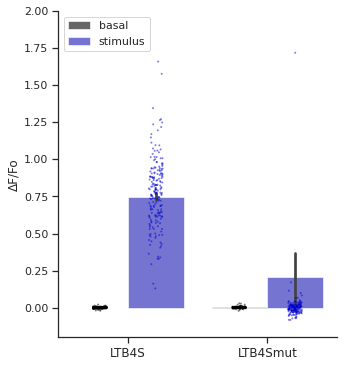

In [10]:
barplot2=barplot_dfperf0 (data2,palette,palette2,-0.2,2)

In [32]:
palette = {"LTB4S":"black","LTB4Smut":"red"}

In [14]:
def lineplot_dfperf0(data,time_len,rate):
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['font.family'] = 'Arial'
    sns.set(rc={'figure.figsize':(10,6)})
    sns.set(style="white") 
    sns.set(style="ticks")
    
    ax=sns.lineplot(x="time", y="dfperf0",hue="tag",data=data, ci=68)
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
    ax.legend_.remove()
    ax.legend(
    handles,labels, loc='upper left')
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    
    meas_len_min=time_len
    ax.set_xticks(range(0,meas_len_min+2,rate))

    ax.set_ylabel("ΔF/Fo",fontsize=12)
    ax.set_xlabel("Time (sec)",fontsize=12)
    fig = ax.get_figure()
    
    return fig


In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv('/media/ben/Analysis/Python/Laci/Human_cyto/s1_2-c1135HEK_c1466_10uM-A23_1/df_analysis.csv')
df = df.rename(columns={'green_':'green','red_':'red'})
df = df.drop(['cell_class','pos_cell'],axis=1)
df['time'] = df.apply(lambda row: (row.Frames-1)*10,axis=1)
df

,Cell,Frames,tag,exp,green,red,Cent.X,Cent.Y,time
0,Human_cyto_s1_1_cell1,1,Human_cyto,Human_cyto_s1_1,2778.098859,160.796850,574,13,0
1,Human_cyto_s1_1_cell1,2,Human_cyto,Human_cyto_s1_1,2767.081654,160.397416,573,14,10
2,Human_cyto_s1_1_cell1,3,Human_cyto,Human_cyto_s1_1,2797.661994,160.401869,573,14,20
3,Human_cyto_s1_1_cell1,4,Human_cyto,Human_cyto_s1_1,2796.990688,158.836006,573,14,30
4,Human_cyto_s1_1_cell1,5,Human_cyto,Human_cyto_s1_1,2800.303850,161.069719,573,14,40
...,...,...,...,...,...,...,...,...,...
3453,Human_cyto_s1_1_cell38,87,Human_cyto,Human_cyto_s1_1,1983.450801,2.616405,734,569,860
3454,Human_cyto_s1_1_cell38,88,Human_cyto,Human_cyto_s1_1,1978.257970,2.459222,729,569,870
3455,Human_cyto_s1_1_cell38,89,Human_cyto,Human_cyto_s1_1,1898.760830,2.143639,723,573,880
3456,Human_cyto_s1_1_cell38,90,Human_cyto,Human_cyto_s1_1,1857.266644,2.454933,734,569,890


In [123]:
def get_ratio(lst):
        combi = []
        for chan in lst:
            t_lst = lst.copy(); t_lst.remove(chan)
            combi += [(chan,x) for x in t_lst]
        return combi

def transfo_df(df_input,channel_list,stim_time,start_baseline=0,posCont_time=None):
    # Apply all possible ratio
    pair_lst = get_ratio(channel_list)
    for c1,c2 in pair_lst:
        df_input[f"{c1}/{c2}"] = df_input[c1]/df_input[c2]
    
    # Add 'condition_label'
    df_input['condition_label'] = 'other'
    df_input.loc[(df_input['time']>=start_baseline)&(df_input['time']<stim_time),'condition_label'] = 'basal'
    df_input.loc[df_input['time']>=stim_time,'condition_label'] = 'stimulus'
    if posCont_time: df_input.loc[df_input['time']>=posCont_time,'condition_label'] = 'positive_control'

    # Apply all possible deltaF
    deltaF_lst = channel_list+[f"{c1}/{c2}" for c1,c2 in pair_lst]
    bi_lst = deltaF_lst+[f'deltaF_{k}' for k in deltaF_lst]
    new_col = [f"deltaF_{k}" for k in deltaF_lst]+[f"{col}_perCondition" for col in bi_lst]
    df_input = df_input.reindex(columns=df_input.columns.to_list()+new_col,fill_value=0)
    for cell in df_input['Cell'].unique():
        df = df_input.loc[(df_input['Cell']==cell)]
        # Apply all possible deltaF
        for col_delta in deltaF_lst:
            f0 = df.loc[df['condition_label']=='basal',col_delta].mean()
            if posCont_time: 
                fmax_val = df.loc[df['condition_label']=='positive_control',col_delta].max()
                perf0 = fmax_val-f0
            else: perf0 = f0
            dfperf0 = (df[col_delta]-f0)/perf0
            df_input.loc[dfperf0.index,f'deltaF_{col_delta}'] = dfperf0.values
        # Add all condition value
        for col in bi_lst:
            df_input.loc[(df_input['Cell']==cell)&(df_input['condition_label']=='basal'),f"{col}_perCondition"] = df_input.loc[(df_input['Cell']==cell)&(df_input['condition_label']=='basal'),col].mean()
            df_input.loc[(df_input['Cell']==cell)&(df_input['condition_label']=='stimulus'),f"{col}_perCondition"] = df_input.loc[(df_input['Cell']==cell)&(df_input['condition_label']=='stimulus'),col].mean()
    
    return df_input

In [124]:
test = df.copy()
test = transfo_df(df_input=test,channel_list=['green','red'],stim_time=300,posCont_time=800)
test.iloc[:,:12]

,Cell,Frames,tag,exp,green,red,Cent.X,Cent.Y,time,green/red,red/green,condition_label
0,Human_cyto_s1_1_cell1,1,Human_cyto,Human_cyto_s1_1,2778.098859,160.796850,574,13,0,17.277073,0.057880,basal
1,Human_cyto_s1_1_cell1,2,Human_cyto,Human_cyto_s1_1,2767.081654,160.397416,573,14,10,17.251410,0.057966,basal
2,Human_cyto_s1_1_cell1,3,Human_cyto,Human_cyto_s1_1,2797.661994,160.401869,573,14,20,17.441580,0.057334,basal
3,Human_cyto_s1_1_cell1,4,Human_cyto,Human_cyto_s1_1,2796.990688,158.836006,573,14,30,17.609299,0.056788,basal
4,Human_cyto_s1_1_cell1,5,Human_cyto,Human_cyto_s1_1,2800.303850,161.069719,573,14,40,17.385663,0.057519,basal
...,...,...,...,...,...,...,...,...,...,...,...,...
3453,Human_cyto_s1_1_cell38,87,Human_cyto,Human_cyto_s1_1,1983.450801,2.616405,734,569,860,758.082395,0.001319,positive_control
3454,Human_cyto_s1_1_cell38,88,Human_cyto,Human_cyto_s1_1,1978.257970,2.459222,729,569,870,804.424447,0.001243,positive_control
3455,Human_cyto_s1_1_cell38,89,Human_cyto,Human_cyto_s1_1,1898.760830,2.143639,723,573,880,885.765263,0.001129,positive_control
3456,Human_cyto_s1_1_cell38,90,Human_cyto,Human_cyto_s1_1,1857.266644,2.454933,734,569,890,756.544607,0.001322,positive_control
